# Métodos de primer orden

Los **métodos de primer orden** son métodos iterativos basados en derivadas de primer orden del objetivo. Dado un punto de inicio $\boldsymbol{\theta}_0$, la iteración $t$ consiste en hacer un paso de actualización (de $\boldsymbol{\theta}$):
$$\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t+\eta_t\boldsymbol{d}_t$$
donde $\eta_t$ es el **tamaño del paso (step size)** o **factor de aprendizaje (learning rate)**, y $\boldsymbol{d}_t$ es una **dirección de descenso** como el negativo del **gradiente**, dado por $\boldsymbol{g}_t=\mathbf{\nabla}\mathcal{L}(\boldsymbol{\theta})\rvert_{\boldsymbol{\theta}_t}$.
Los pasos de actualización se suceden hasta que el método alcanza un punto estacionario, esto es,
de gradiente nulo.

## Dirección de descenso

Decimos que $\boldsymbol{d}$ es una **dirección de descenso** si existe un $\eta_{\text{max}}>0$ tal que
$$\mathcal{L}(\boldsymbol{\theta}+\eta\boldsymbol{d})<\mathcal{L}(\boldsymbol{\theta})%
\qquad\text{para todo}\;\eta\in(0, \eta_{\text{max}})$$
El gradiente en $\boldsymbol{\theta}_t$, $\boldsymbol{g}_t=\mathbf{\nabla}\mathcal{L}(\boldsymbol{\theta})\rvert_{\boldsymbol{\theta}_t}=\mathbf{\nabla}\mathcal{L}(\boldsymbol{\theta}_t)=\boldsymbol{g}(\boldsymbol{\theta}_t)$ apunta en la dirección de máximo ascenso de $\mathcal{L}$, mientras que su negativo lo hace en la de máximo decenso. 

En general, $\boldsymbol{d}_t$ es dirección de descenso si $\boldsymbol{d}_t^t\boldsymbol{g}_t<0$, esto es, si $\boldsymbol{d}_t$ y $\boldsymbol{g}_t$ forman un ángulo mayor de $90$ grados (en el plano que los contiene). Este resultado incluye $\boldsymbol{d}_t=-\mathbf{B}_t\boldsymbol{g}_t$ para toda matriz $\mathbf{B}_t$ definida positiva.

**Descenso más pronunciado (steepest descent)** escoge el negativo del gradiente como dirección de descenso:
$$\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t-\eta_t\boldsymbol{g}_t$$

**Ejemplo:** $\;\mathcal{L}(\theta)=\theta^2$, $\theta_0=10$, $\eta_t=0.2$, tolerancia $0.01$

In [1]:
import numpy as np

grad, theta, eta, tol, delta = lambda t: 2*t, 10.0, 0.2, 0.01, np.inf
while np.abs(delta) > tol:
	delta = -eta * grad(theta)
	theta += delta
	print(np.round(delta, 4), np.round(theta, 4))

-4.0 6.0
-2.4 3.6
-1.44 2.16
-0.864 1.296
-0.5184 0.7776
-0.311 0.4666
-0.1866 0.2799
-0.112 0.168
-0.0672 0.1008
-0.0403 0.0605
-0.0242 0.0363
-0.0145 0.0218
-0.0087 0.0131


## Tamaño de paso o factor de aprendizaje

La opción más simple consiste en escoge un tamaño de paso constante, $\eta_t=\eta$. Ahora bien, el método puede no converger si $\eta$ es muy grande, o converger muy lentamente si $\eta$ es muy pequeño.

**Ejemplo:** $\;\boldsymbol{\theta}=(\theta_1,\theta_2)^t$, $\;\mathcal{L}(\boldsymbol{\theta})=0.5(\theta_1^2-\theta_2)^2+0.5(\theta_1-1)^2$, $\;\mathbf{\nabla}\mathcal{L}(\boldsymbol{\theta})=(2\theta_1(\theta_1^2-\theta_2)+\theta_1-1, \theta_2-\theta_1^2)^t$, $\;\boldsymbol{\theta}_0=\boldsymbol{0}$, $\;\eta_t=0.4$, tolerancia $0.01$

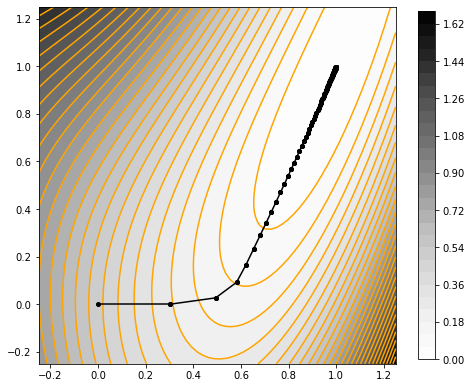

In [2]:
import numpy as np
import matplotlib.pyplot as plt

eta = 0.3 # <--- con otros valores no converge o lo hace muy lentamente
L = lambda t: 0.5 * np.square(np.square(t[0]) - t[1]) + 0.5 * np.square(t[0] - 1)
theta1, theta2 = np.meshgrid(np.linspace(-0.25, 1.25, num=64), np.linspace(-0.25, 1.25, num=64))
theta = np.squeeze(np.dstack([np.ravel(theta1), np.ravel(theta2)]))
Ltheta = np.apply_along_axis(L, 1, theta)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set(aspect='equal')
ax.contour(theta1, theta2, Ltheta.reshape(theta1.shape), 30, colors='orange')
cp = ax.contourf(theta1, theta2, Ltheta.reshape(theta1.shape), 30, cmap='Greys')
plt.colorbar(cp, ax=ax, shrink=0.8)
grad = lambda t: np.array([2 * t[0] * (np.square(t[0]) - t[1]) + t[0] - 1, t[1] - np.square(t[0])])
theta, tol, delta, t = np.zeros(2), 0.01, np.inf, 1
while np.max(np.abs(delta)) > tol and t < 100: # <--- número máximo de iteraciones
    oldtheta = np.copy(theta)
    theta = theta - eta * grad(theta)
    t = t + 1
    plt.plot([oldtheta[0], theta[0]], [oldtheta[1], theta[1]], 'o-k', markersize=4)

En lugar de fijar un tamaño de paso constante, podemos tratar de hallar el paso óptimo en la dirección escogida mediante **búsqueda lineal**:
$$\eta_t=\operatorname*{argmin}\limits_{\eta>0}\;\phi_t(\eta)%
\quad\text{con}\quad%
\phi_t(\eta)=\mathcal{L}(\boldsymbol{\theta}_t+\eta\boldsymbol{d}_t)$$
Si $\mathcal{L}$ es convexa, esta optimización puede resolverse analíticamente, esto es,
$\eta_t$ puede hallarse con exactitud. No obstante, suelen emplearse técnicas de búsqueda lineal aproximada como el **método de backtracking Armijo**. Este método parte del $\eta$ actual o uno grande y lo reduce iterativamente mediante un factor $\beta\in(0, 1)$ hasta cumplir la **condición de Armijo-Goldstein**:
$$\mathcal{L}(\boldsymbol{\theta}_t+\eta\boldsymbol{d}_t)\leq\mathcal{L}(\boldsymbol{\theta}_t)+c\,\eta\,\boldsymbol{d}_t^t\,\boldsymbol{g}_t$$
donde $\,c\in(0,1)\,$ es una constante, típicamente $c=10^{-4}$.

## Ratios de convergencia

Bajo ciertas condiciones de regularidad, descenso por gradiente converge linealmente con **ratio de convergencia** $\mu\in(0,1)$, esto es,
$$\lvert\mathcal{L}(\boldsymbol{\theta}_{t+1})-\mathcal{L}(\boldsymbol{\theta_*})\rvert\leq\mu%
\lvert\mathcal{L}(\boldsymbol{\theta}_t)-\mathcal{L}(\boldsymbol{\theta_*})\rvert$$
Si el objetivo es cuadrático con matriz asociada $\mathbf{A}$ definida positiva,
$$\mathcal{L}(\boldsymbol{\theta})%
=\frac{1}{2}\boldsymbol{\theta}^t\mathbf{A}\boldsymbol{\theta}+\boldsymbol{b}^t\boldsymbol{\theta}+c$$
se puede comprobar que el ratio de convergencia es función del número de condición de $\mathbf{A}$, $\kappa(\mathbf{A})=\dfrac{\lambda_{\text{max}}}{\lambda_{\text{min}}}$,
$$\mu%
%=\left(\frac{\lambda_{\text{max}}(\mathbf{A})-\lambda_{\text{min}}(\mathbf{A})}%
%{\lambda_{\text{max}}(\mathbf{A})+\lambda_{\text{min}}(\mathbf{A})}\right)^2%
=\left(\frac{\kappa(\mathbf{A})-1}{\kappa(\mathbf{A})+1}\right)^2$$
por lo que la convergencia será más rápida cuanto mejor condicionado esté el objetivo ($\kappa(\mathbf{A})$ cerca de $1$).


**Ejemplo:** $\;\mathbf{A}=\begin{pmatrix}20&5\\5&16\end{pmatrix}\,$ bien condicionada y 
$\;\mathbf{A}=\begin{pmatrix}20&5\\5&2\end{pmatrix}\,$ peor condicionada; $\;\boldsymbol{b}=(-14, -6)^t$, $\;c=10$

Número de condición:  30.2336


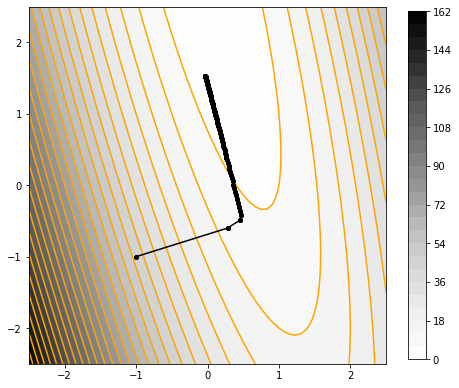

In [3]:
import numpy as np
import matplotlib.pyplot as plt

eta = 2e-2 # <--- con otros valores no converge o lo hace muy lentamente
# A, b, c = np.array([ [20, 5], [5, 16] ]), np.array([-14, -6]), 10 # <--- bien condicionada
A, b, c = np.array([ [20, 5], [5,  2] ]), np.array([-14, -6]), 10 # <--- mal condicionada
print("Número de condición: ", np.round(np.linalg.cond(A), 4))
L = lambda t: 0.5 * t.T @ A @ t + b @ t + c
theta1, theta2 = np.meshgrid(np.linspace(-2.5, 2.5, num=64), np.linspace(-2.5, 2.5, num=64))
theta = np.squeeze(np.dstack([np.ravel(theta1), np.ravel(theta2)]))
Ltheta = np.apply_along_axis(L, 1, theta)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set(aspect='equal')
ax.contour(theta1, theta2, Ltheta.reshape(theta1.shape), 30, colors='orange')
cp = ax.contourf(theta1, theta2, Ltheta.reshape(theta1.shape), 30, cmap='Greys')
plt.colorbar(cp, ax=ax, shrink=0.8)
grad = lambda t: (A + A.T) @ t + b
theta, tol, delta, t = -1.0 * np.ones(2), 0.01, np.inf, 1
while np.max(np.abs(delta)) > tol and t < 100: # <--- número máximo de iteraciones
    oldtheta = np.copy(theta)
    theta = theta - eta * grad(theta)
    t = t + 1
    plt.plot([oldtheta[0], theta[0]], [oldtheta[1], theta[1]], 'o-k', markersize=4)

Si el objetivo no es cuadrático, se suele asumir que al menos es localmente cuadrático, por lo que el ratio de convergencia dependerá del número de condición de la Hessiana ($\mathbf{A}$).

## Momentum

**Momentum** es un heurístico que acelera el movimiento en direcciones previamente buenas y lo frena en las que el gradiente ha cambiado súbitamente, como una bola pesada rodando montaña abajo. Formalmente, dada una constante $\beta\in[0,1)$, típicamente $\beta=0.9$, el momentum $\boldsymbol{m}_t$ se calcula y aplica como sigue:
$$\begin{align*}
\boldsymbol{m}_{t+1}&=\beta\boldsymbol{m}_t+\boldsymbol{g}_t\\%
\boldsymbol{\theta}_{t+1}&=\boldsymbol{\theta}_t-\eta_t\boldsymbol{m}_{t+1}
\end{align*}$$



**Ejemplo (cont.):** $\;\mathbf{A}=\begin{pmatrix}20&5\\5&16\end{pmatrix}\,$ bien condicionada y 
$\;\mathbf{A}=\begin{pmatrix}20&5\\5&2\end{pmatrix}\,$ peor condicionada; $\;\boldsymbol{b}=(-14, -6)^t$, $\;c=10$

Número de condición:  30.2336


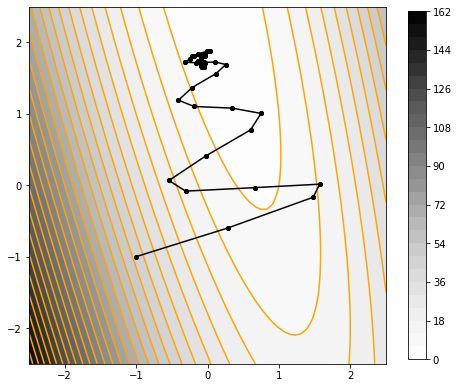

In [4]:
import numpy as np
import matplotlib.pyplot as plt

beta = 0.8 # <--- prueba otros valores
eta = 2e-2 # <--- con otros valores no converge o lo hace muy lentamente
# A, b, c = np.array([ [20, 5], [5, 16] ]), np.array([-14, -6]), 10 # <--- bien condicionada
A, b, c = np.array([ [20, 5], [5,  2] ]), np.array([-14, -6]), 10 # <--- peor condicionada
print("Número de condición: ", np.round(np.linalg.cond(A), 4))
L = lambda t: 0.5 * t.T @ A @ t + b @ t + c
theta1, theta2 = np.meshgrid(np.linspace(-2.5, 2.5, num=64), np.linspace(-2.5, 2.5, num=64))
theta = np.squeeze(np.dstack([np.ravel(theta1), np.ravel(theta2)]))
Ltheta = np.apply_along_axis(L, 1, theta)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set(aspect='equal')
ax.contour(theta1, theta2, Ltheta.reshape(theta1.shape), 30, colors='orange')
cp = ax.contourf(theta1, theta2, Ltheta.reshape(theta1.shape), 30, cmap='Greys')
plt.colorbar(cp, ax=ax, shrink=0.8)
grad = lambda t: (A + A.T) @ t + b
momentum, theta, tol, delta, t = np.zeros(2), -1.0 * np.ones(2), 0.01, np.inf, 1
while np.max(np.abs(delta)) > tol and t < 100: # <--- número máximo de iteraciones
    oldtheta = np.copy(theta)
    momentum = beta * momentum + grad(theta)
    theta = theta - eta * momentum
    t = t + 1
    plt.plot([oldtheta[0], theta[0]], [oldtheta[1], theta[1]], 'o-k', markersize=4)